-----------------------------------
#### documents, nodes, and indexes
--------------------------------

- **It all begins with the data**: Handling raw data directly can be challenging, like trying to hold water in your hands.
- **Lack of structure**: Raw data often lacks a clear structure, making it difficult to manage.
- **The role of Documents in LlamaIndex**: Documents in LlamaIndex help capture and organize data, whether entered manually or loaded from an external source.
- **Analogy**: Think of a Document as a bottle that contains the data, making it easier to handle and process.
- **Use case - Company procedures**: If you have company procedures saved as PDFs, each of them can be converted into a Document object in LlamaIndex for easy analysis using models like GPT-4.
- **Not just files**: Documents can also represent data from other sources, like databases or APIs, not limited to just files.

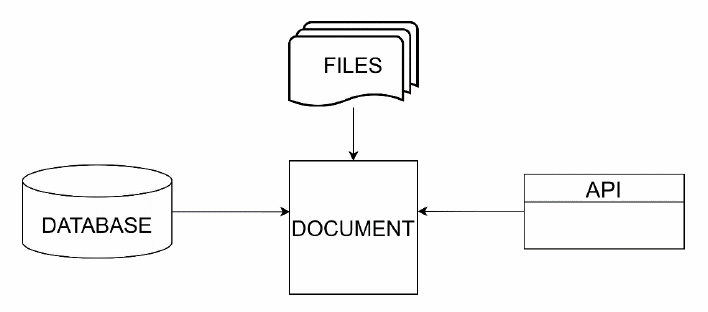

In [2]:
#pip install llama-index

In [50]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

The `SimpleDirectoryReader` in LlamaIndex (formerly known as GPT Index) is a utility designed for easy ingestion of documents from a directory into a data structure that can be used to build an index. 

This reader helps in automatically reading and loading files from a specified directory, preparing the content for indexing, which can later be queried or used for other applications, such as retrieval-augmented generation (RAG).

**Key Features:**
- Automated File Reading: It can read all the files in a given directory, often supporting a variety of file types like .txt, .pdf, .docx, etc.
- Recursive Reading: It has options to read files recursively if the directory contains subfolders.
- Custom Parsing: You can apply custom parsing logic for specific file types or specific use cases.

In [51]:
documents = SimpleDirectoryReader('files').load_data()

In [52]:
len(documents)

2

In [53]:
dict(documents[0])

{'id_': 'b94bcf86-f1b3-41c3-88ca-0bfc77716740',
 'embedding': None,
 'metadata': {'file_path': 'D:\\gridflowAI\\00-ALL COURSES REPO\\Innovative-AI\\01-GenAI\\06-LLMs\\code\\05-various LLMs\\10-LlamaIndex\\01-step wise examples\\files\\sample_document1.txt',
  'file_name': 'sample_document1.txt',
  'file_type': 'text/plain',
  'file_size': 612,
  'creation_date': '2024-09-14',
  'last_modified_date': '2024-09-07'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {},
 'text': "In ancient Rome, the city of Rome itself was the heart of the vast Roman Empire. It was known for its grand architecture, including iconic structures like the Colosseum and the Pantheon. The Romans were skilled engineers and builders, creating an extensive netwo

In [54]:
from pprint import pprint

In [55]:
# Function to pretty print document content and metadata
def pretty_print_documents(documents):
    for doc in documents:
        print(f"Document ID: {doc.id_}")
        print("Metadata:")
        pprint(doc.metadata, indent=4)
        print("\nContent:")
        print(doc.text)
        print("="*80)  # separator between documents

# Call the function
pretty_print_documents(documents)

Document ID: b94bcf86-f1b3-41c3-88ca-0bfc77716740
Metadata:
{   'creation_date': '2024-09-14',
    'file_name': 'sample_document1.txt',
    'file_path': 'D:\\gridflowAI\\00-ALL COURSES '
                 'REPO\\Innovative-AI\\01-GenAI\\06-LLMs\\code\\05-various '
                 'LLMs\\10-LlamaIndex\\01-step wise '
                 'examples\\files\\sample_document1.txt',
    'file_size': 612,
    'file_type': 'text/plain',
    'last_modified_date': '2024-09-07'}

Content:
In ancient Rome, the city of Rome itself was the heart of the vast Roman Empire. It was known for its grand architecture, including iconic structures like the Colosseum and the Pantheon. The Romans were skilled engineers and builders, creating an extensive network of roads, aqueducts, and bridges that connected their far-reaching territories. The Roman Republic, with its Senate and elected officials, gave rise to the famous Roman legions, which conquered vast lands and brought them under Roman rule. The Roman civili

#### Document

- **Document class as a container**: Think of the `Document` class as a container for data.
- **Raw data and metadata**: It holds not only the raw text or data from its original source but also any additional information (metadata) you decide to include.
- **Metadata's importance**: Metadata is crucial for enhancing the searchability of your Documents.
- **Query specificity**: With metadata, you can perform more specific and detailed queries, making your searches more effective.


In [56]:
from llama_index.core import Document

In [57]:
text = "The quick brown fox jumps over the lazy dog."

In [58]:
doc = Document(
    text     = text,
    metadata = {'author': 'bhupen','category': 'others'},
    id_      = '1'
)

print(doc)

Doc ID: 1
Text: The quick brown fox jumps over the lazy dog.


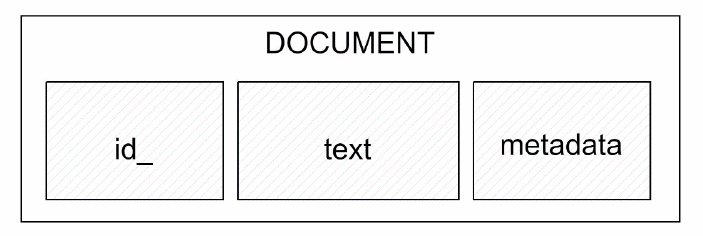

#### automated data ingestion

In [21]:
#!pip install wikipedia

In [59]:
#!pip install llama-index-readers-wikipedia

In [60]:
from llama_index.readers.wikipedia import WikipediaReader

In [61]:
loader = WikipediaReader()

In [62]:
documents = loader.load_data(
                pages=['AI', 'Deep Learning']
)

In [63]:
print(f"loaded {len(documents)} documents")

loaded 2 documents


In [64]:
# Call the function
pretty_print_documents(documents)

Document ID: 202898
Metadata:
{}

Content:
The atmosphere of Earth is composed of a layer of gas mixture that surrounds the Earth's planetary surface (both lands and oceans), known collectively as air, with variable quantities of suspended aerosols and particulates (which create weather features such as clouds and hazes), all retained by Earth's gravity. The atmosphere serves as a protective buffer between the Earth's surface and outer space, shields the surface from most meteoroids and ultraviolet solar radiation, keeps it warm and reduces diurnal temperature variation (temperature extremes between day and night) through heat retention (greenhouse effect), redistributes heat and moisture among different regions via air currents, and provides the chemical and climate conditions allowing life to exist and evolve on Earth.
By mole fraction (i.e., by quantity of molecules), dry air contains 78.08% nitrogen, 20.95% oxygen, 0.93% argon, 0.04% carbon dioxide, and small amounts of other trace

#### Nodes

While Documents represent the raw data and can be used as such, Nodes are smaller chunks of content extracted from the Documents. The goal is to break down Documents into smaller, more manageable pieces of text. This serves a few purposes:

- Solves prompt limit problems: Allows us to feed only relevant parts of large documents.
- Creates semantic units of data: Organizes data into smaller, more focused units.
- Allows the creation of relationships between Nodes: Connects Nodes based on their relationships. Helps understand connections and dependencies between different pieces of information.

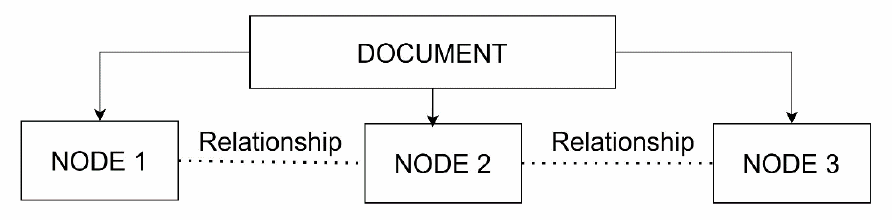

- Nodes can store Images too
- But we will focus on TEXT NODE Class

**TextNode**

- Chunk of text derived from an original Document.
- Attributes:
    - `start_char_idx` and `end_char_idx`: Optional integer values for starting and ending character positions.
    - `text_template` and `metadata_template`: Template fields for formatting text and metadata.
    - `metadata_seperator`: String field for separating metadata fields.
    - `metadata`: Any useful metadata (e.g., parent Document ID, relationships, tags).

#### Manually creating the Node objects

In [65]:
from llama_index.core import Document
from llama_index.core.schema import TextNode

In [66]:
doc = Document(text="This is a sample document text")

In [67]:
n1 = TextNode(text=doc.text[0:16],  doc_id=doc.id_)
n2 = TextNode(text=doc.text[17:30], doc_id=doc.id_)

In [68]:
n1, n2

(TextNode(id_='108940b6-b089-49fb-87af-95f25c382358', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='This is a sample', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 TextNode(id_='2a374838-1974-4b7a-8b19-7380f0531863', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='document text', mimetype='text/plain', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'))

**Automatically extracting Nodes from Documents using splitters**

- we can automatically generate Nodes, TokenTextSplitter attempts to split the Document text into chunks that contain whole sentences. 
- Each chunk will include one or more sentences and there’s also a default overlap between the chunks to maintain more context

In [69]:
from llama_index.core import Document
from llama_index.core.node_parser import TokenTextSplitter

In [70]:
doc = Document(
    text=(
        "This is sentence 1. "
        "This is sentence 2. "
        "This is Sentence 3. "
    ),
    metadata={"author": "Grokkers Founder"}
)

splitter = TokenTextSplitter(
    chunk_size   = 17,
    chunk_overlap= 0,
    separator    = "."
)

nodes = splitter.get_nodes_from_documents([doc])

for node in nodes:
    print(node.text)
    print(node.metadata)

Metadata length (8) is close to chunk size (17). Resulting chunks are less than 50 tokens. Consider increasing the chunk size or decreasing the size of your metadata to avoid this.
This is sentence 1
{'author': 'Grokkers Founder'}
. This is sentence 2
{'author': 'Grokkers Founder'}
. This is Sentence 3.
{'author': 'Grokkers Founder'}


**Nodes and relations**

In [71]:
from llama_index.core import Document
from llama_index.core.schema import (
    TextNode,
    NodeRelationship,
    RelatedNodeInfo
)

In [72]:
doc = Document(text="First sentence. Second Sentence")

n1  = TextNode(text="First sentence",  node_id=doc.doc_id)
n2  = TextNode(text="Second sentence", node_id=doc.doc_id)

In [73]:
n1.relationships[NodeRelationship.NEXT]     = n2.node_id
n2.relationships[NodeRelationship.PREVIOUS] = n1.node_id

In [74]:
print(n1.relationships)
print(n2.relationships)

{<NodeRelationship.NEXT: '3'>: 'd02a8717-5370-4775-9c59-b2c3372c1ca8'}
{<NodeRelationship.PREVIOUS: '2'>: '8ac83332-45aa-4e08-9c81-e2503e128e36'}


In this example, we’ve manually created two Nodes and defined a previous or next relationship
between them. The relationship tracks the order of Nodes within the original Document. This code tells
LlamaIndex that the two Nodes belong to the initial Document and they also come in a particular order.

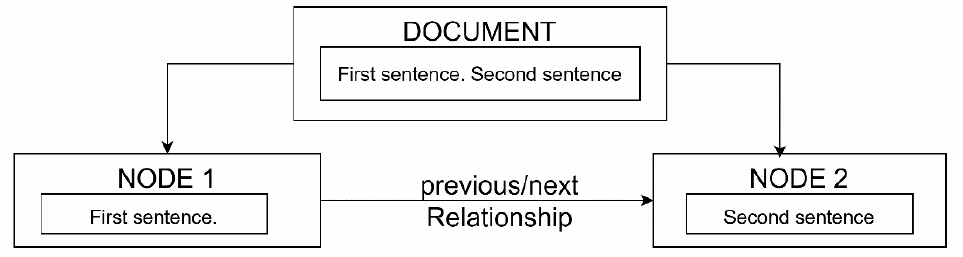

- **SOURCE**: Represents the original document from which a node was extracted or parsed. When a document is split into multiple nodes, the source relationship tracks the document each node originated from.

- **PARENT**: Indicates a hierarchical structure where the parent node is one level higher than its associated child nodes. Used in tree-like structures to represent a main node with subordinate sections, paragraphs, or subdivisions.

- **CHILD**: The opposite of the parent relationship. A child node is a subordinate to a parent node, serving as a leaf or branch in a hierarchical tree structure.


#### Why are relationships important?

Creating relationships between Nodes in LlamaIndex can be useful for several reasons:

- **Enables more contextual querying**: By linking Nodes together, you can leverage their relationships during querying to retrieve additional relevant context. For example, when querying a node, you could also return the previous or next Nodes to provide more context.

- **Allows tracking provenance**: Relationships encode provenance – where source Nodes originated and how they are connected. This is useful when you need to identify the original source of a node.

- **Enables navigation through nodes**: Traversing Nodes by their relationships enables new types of queries, such as finding the next node that contains a specific keyword. Navigation along relationships provides another dimension for searching.

- **Supports the construction of knowledge graphs**: Nodes and relationships are the building blocks of knowledge graphs. Linking Nodes into a graph structure allows for constructing knowledge graphs from text using LlamaIndex. (More on this in Chapter 5: *Indexing with LlamaIndex*).

- **Improves the index structure**: Some LlamaIndex indexes, such as trees and graphs, use node relationships to build their internal structure. This allows for the creation of more complex and expressive index topologies (discussed further in Chapter 5).

In summary, relationships augment Nodes with additional contextual connections, supporting more expressive querying, source tracking, knowledge graph construction, and the development of complex index structures.


#### Indexes

LlamaIndex supports different types of indexes, each with unique strengths and trade-offs. Here are some of the available index types:

- **SummaryIndex**: Functions like a recipe box, keeping Nodes in order for sequential access. It chunks documents into Nodes and concatenates them into a list, making it ideal for reading through large documents.

- **DocumentSummaryIndex**: Creates a concise summary for each document and maps these summaries back to their respective nodes. This facilitates quick identification of relevant documents by summarizing them for efficient information retrieval.

- **VectorStoreIndex**: A sophisticated index often used in Retrieval-Augmented Generation (RAG) applications. It converts text into vector embeddings, groups similar Nodes using mathematical techniques, and helps locate Nodes that are alike.

- **TreeIndex**: Organizes Nodes in a hierarchical, tree-like structure, with parent nodes storing summaries of child nodes. Summaries are generated using an LLM. This index is particularly useful for tasks that involve summarization.

- **KeywordTableIndex**: Similar to finding a dish by ingredients, this index links important keywords to the Nodes that contain them. It makes locating any node easy by searching for specific keywords.

- **KnowledgeGraphIndex**: Used to link facts within a large network of data, stored as a knowledge graph. This index excels at answering complex queries about interconnected information.

- **ComposableGraph**: Allows for building complex index structures where document-level indexes are indexed into higher-level collections. It even supports creating an "index of indexes" to access data from multiple documents in a larger collection.


**SummaryIndex**

In [75]:
from llama_index.core import SummaryIndex, Document

In [76]:
from llama_index.core.schema import TextNode

In [77]:
nodes = [
    TextNode(text="Lionel Messi is a football player from Argentina."),
    TextNode(text="He also played cricket. He has won the Ballon d'Or trophy 7 times."),
    TextNode(text="Lionel Messi's hometown is Rosario."),
    TextNode(text="He was born on June 24, 1987.")
]

In [78]:
index = SummaryIndex(nodes)

Let’s use the Lionel Messi index we just created as an example. Say you ask, “What is Messi’s hometown?”

In [79]:
import os

In [80]:
# os.getenv('OPENAI_API_KEY')

In [81]:
# needs OPENAI_API_KEY to be set
# Convert the index to a query engine.

query_engine = index.as_query_engine()

In [82]:
response = query_engine.query("What is Messi's hometown?")
print(response)

Rosario


In [83]:
response = query_engine.query("How many time Messi won Ballon d'Or trophy")
print(response)

Messi has won the Ballon d'Or trophy 7 times.


In [84]:
response = query_engine.query("What sport Messi played?")
print(response)

Football


#### QueryEngine Overview

- **Retriever**:
  - Responsible for retrieving relevant Nodes from the index for the query.
  - Performs a lookup to fetch and rank relevant Nodes from the index.
  - Retrieves Nodes that likely contain information related to the query (e.g., information about Messi’s hometown).

- **Node Postprocessor**:
  - Comes into play after Nodes have been retrieved by the retriever.
  - Enables transformation, re-ranking, or filtering of Nodes before the final response is crafted.
  - Multiple types of postprocessors are available, customizable for different use cases.

- **Response Synthesizer**:
  - Takes the retrieved and processed Nodes to craft the final response using the LLM.
  - Steps involved:
    1. Formats the selected Nodes and the query into an LLM prompt.
    2. The prompt includes the query and context from the Nodes.
    3. The LLM generates a response based on the prompt.
    4. Postprocessing (if necessary) is applied to the raw response, producing a final natural language answer.

- **index.as_query_engine()**:
  - Creates a complete query engine with the default components:
    - Retriever
    - Node Postprocessor
    - Response Synthesizer
  - The final result of running this engine will be a natural language answer (e.g., "Messi's hometown is Rosario").


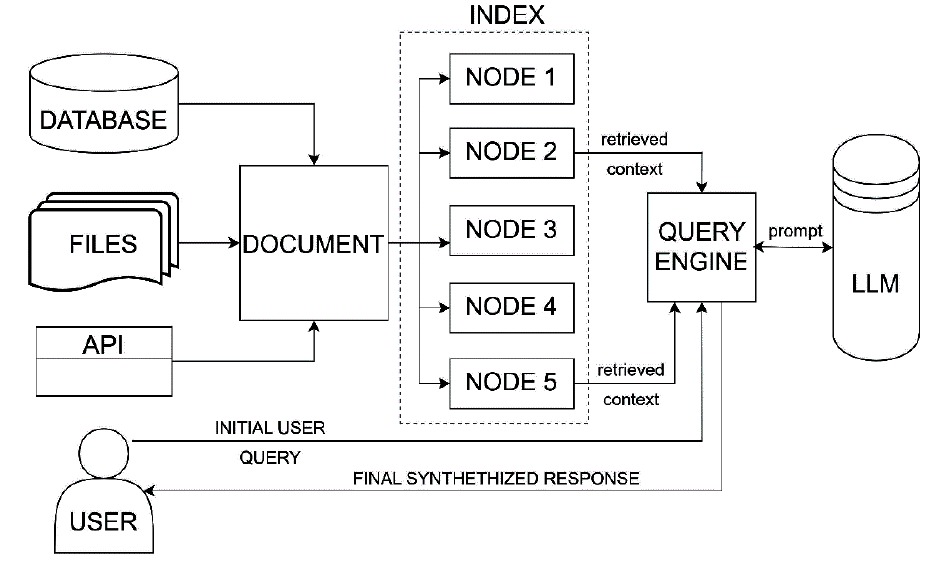

1. Loading data as Documents
2. Parsing Documents into coherent Nodes
3. Building an optimized index from Nodes
4. Running queries over the index to retrieve relevant Nodes
5. Synthesizing the final response

**Summary of building blocks**

    • Documents: The raw data ingested
    • Nodes: Logical chunks extracted from Documents
    • Indexes: Data structures organizing Nodes based on use case
    • QueryEngine: This contains a retriever, node postprocessor, and response synthesizer